In [2]:
import pandas as pd

In [3]:
# Set the display option to show a maximum of 50 columns
pd.set_option('display.max_columns', 50)

In [4]:
# Loading data in df

# file path
file_path= r"C:\Users\arpit\Desktop\UG\Arpit Agrawal DS\Marsh Case Study\Data - Case Study 1.xlsx"


df = pd.read_excel(file_path,sheet_name='Data',header=0)
df.head()

,Unique_ID,Case Number,Date of Birth,Accident State,Loss Type,Status_Updated,Loss Date,Closed Date,Report Date,Cause Description,Litigation,Occupation,Carrier,Sector/Industry,Claim Cost,High Cost
0,1,E8P0048,NaN,IN,Indemnity,Closed,2016-09-28,2016-11-30,2016-10-03,THE IW REPORTED HE WAS WALKING BACK TO FORK LI...,NO,NaN,Carrier 1,Industrials,13491.900269,0
1,2,E8P0649,NaN,IN,Indemnity,Open,2016-09-30,NaT,2016-10-11,"IE WAS GETTING OFF A FORKLIFT, FOOT SLIPPED AN...",NO,NaN,Carrier 1,Industrials,400921.536300,1
2,3,E9S0726,NaN,IN,Medical Only,Closed,2017-01-24,2018-01-06,2017-03-02,"IW WAS WALKING AROUND A SHEETING MACHINE, WHEN...",NO,NaN,Carrier 1,Industrials,4886.505400,0
3,4,E8P4445,NaN,IN,Medical Only,Closed,2016-11-29,2017-02-21,2016-12-02,"IW WAS HANDLING MATERIAL, CONFIRMING ORDER, IW...",NO,NaN,Carrier 1,Industrials,2506.715738,0
4,5,E7D4228,NaN,IN,Indemnity,Closed,2016-07-08,2017-02-18,2016-07-22,IW GOT FIBER GLASS DEBRIS IN EYE,NO,NaN,Carrier 1,Industrials,2916.488363,0


In [5]:
df.shape

(57740, 16)

In [6]:
# Strip whitespace from column names
df.columns = df.columns.str.strip()

## Exploratory Data Analysis

### Distibution of Claim Cost

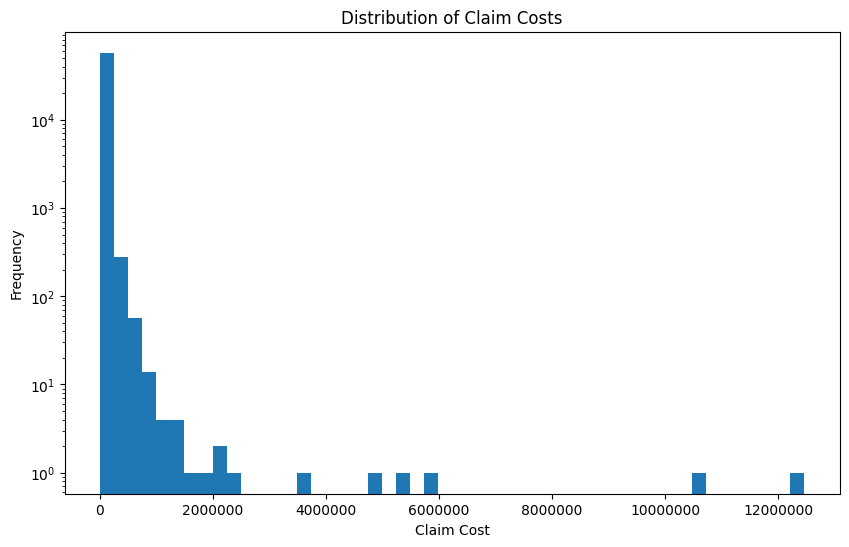

In [7]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Plot distribution of claim costs
plt.figure(figsize=(10, 6))
df['Claim Cost'].plot(kind='hist', bins=50, logy=True)
plt.title('Distribution of Claim Costs')
plt.xlabel('Claim Cost')
plt.ylabel('Frequency')

# Disable scientific notation
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.xaxis.get_major_formatter().set_scientific(False)
ax.xaxis.get_major_formatter().set_useOffset(False)

plt.show()




### Zooming into bins between 0 and 2 million

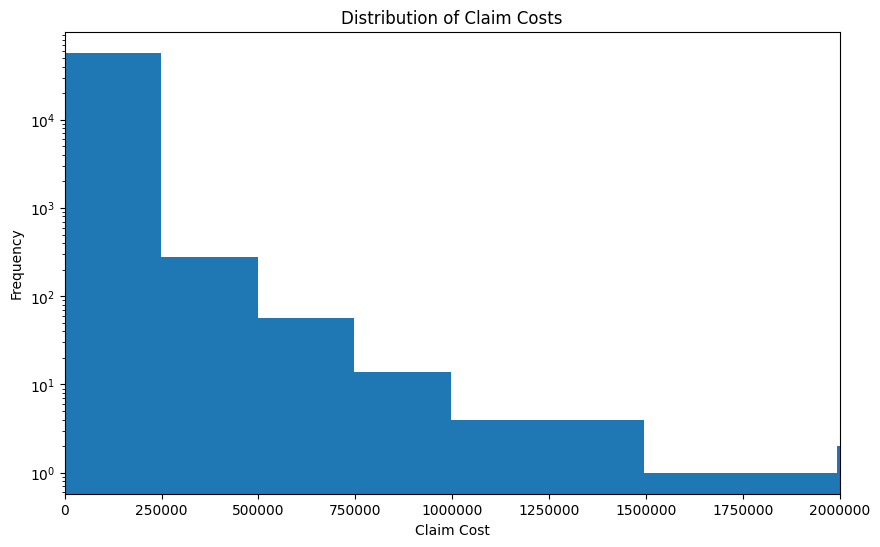

In [8]:
# Plot distribution of claim costs
plt.figure(figsize=(10, 6))
df['Claim Cost'].plot(kind='hist', bins=50, logy=True)
plt.title('Distribution of Claim Costs')
plt.xlabel('Claim Cost')
plt.ylabel('Frequency')

# Disable scientific notation
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.xaxis.get_major_formatter().set_scientific(False)
ax.xaxis.get_major_formatter().set_useOffset(False)

# Set x-axis limit to zoom into bins between 0 and 2 million
plt.xlim(0, 2000000)

plt.show()

- The majority of claim costs are concentrated in the lower range (0 to 250,000) as evident from the high frequency of bars in this range
- Claims between 250,000 and 2 million are relatively sparse compared to the lower ranges. There are very few claims in the higher bins, indicating that such high-cost claims are rare.

### Litigation Impact on Claim Costs

<Figure size 1000x600 with 0 Axes>

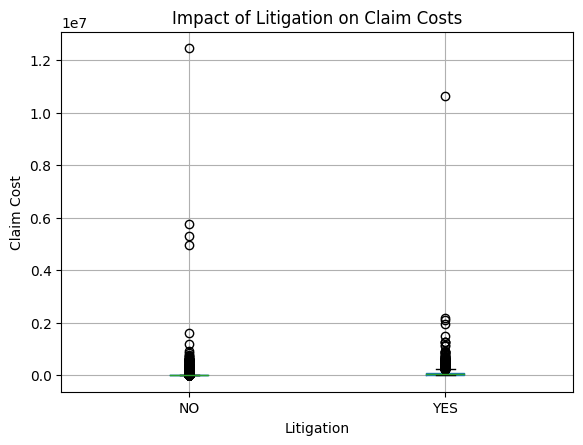

In [9]:
# Converting all values in the 'Litigation' column to uppercase
df['Litigation'] = df['Litigation'].str.upper()

# Box plot of claim costs with and without litigation
plt.figure(figsize=(10, 6))
df.boxplot(column='Claim Cost', by='Litigation')
plt.title('Impact of Litigation on Claim Costs')
plt.xlabel('Litigation')
plt.ylabel('Claim Cost')
plt.suptitle('')
plt.show()


- Both NO and YES categories have a large number of outliers with very high claim costs. These outliers are represented by the circles above the upper whisker of the boxplot.
- There are claims that go as high as over 10 million, which are considered extreme outliers in both categories.
- The boxplot shows that the median claim costs (represented by the line inside the box) are relatively low for both categories (NO and YES).
- The interquartile range (IQR), which represents the middle 50% of the data, is very tight and close to the lower end for both categories. This suggests that the majority of claims are relatively low in cost.

A Visual Guide on Linear vs Log Scale : https://www.quantifiedstrategies.com/linear-vs-logarithmic-charts/

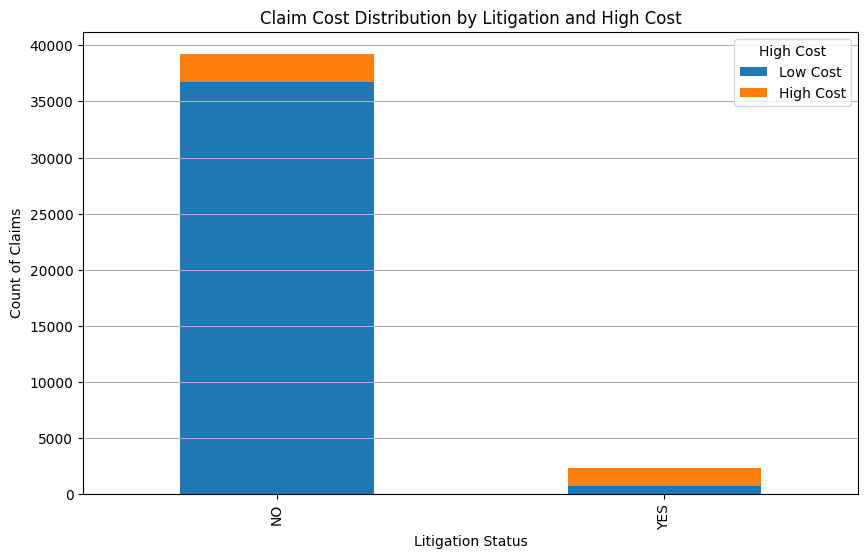

In [12]:
# Aggregating the data
agg_data = df.groupby(['Litigation', 'High Cost']).size().unstack(fill_value=0)

# Plotting the data
agg_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Claim Cost Distribution by Litigation and High Cost')
plt.xlabel('Litigation Status')
plt.ylabel('Count of Claims')
plt.legend(title='High Cost', labels=['Low Cost', 'High Cost'])
plt.grid(axis='y')
plt.show()

In [13]:
agg_data

High Cost,0,1
Litigation,,
NO,36719,2528
YES,672,1626


### Insights:
- Number of claims with no litigation but high cost are more than number of claims with litigation and high cost.

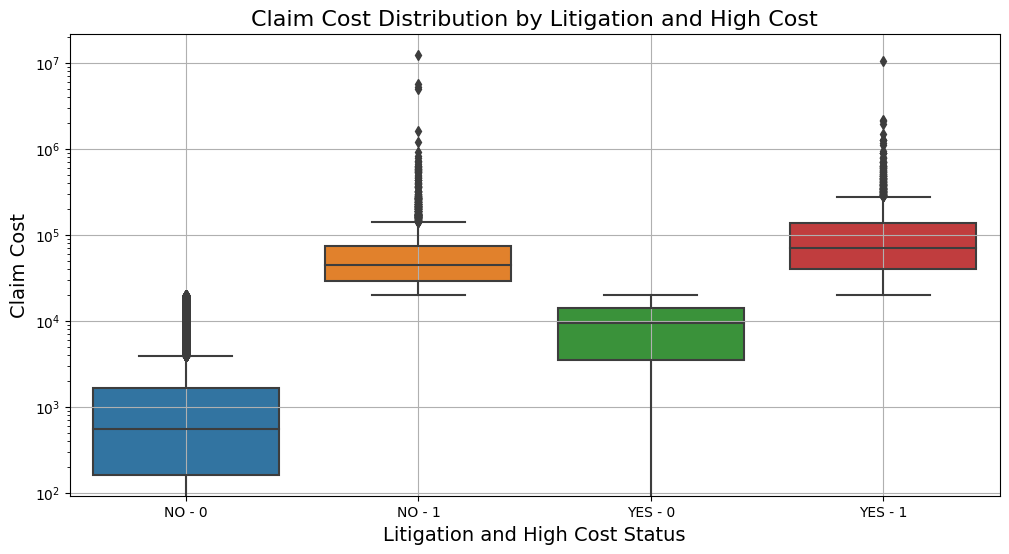

In [14]:
# Combine Litigation and High Cost into one category for plotting
df['Litigation_HighCost'] = df['Litigation'] + ' - ' + df['High Cost'].astype(str)

# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Litigation_HighCost', y='Claim Cost', data=df)
plt.yscale('log')
plt.title('Claim Cost Distribution by Litigation and High Cost', fontsize=16)
plt.xlabel('Litigation and High Cost Status', fontsize=14)
plt.ylabel('Claim Cost', fontsize=14)
plt.grid(True)
plt.show()

### Interpretation:
- The distribution of claim costs for litigated claims (both YES - 0 and YES - 1) generally shows higher values compared to non-litigated claims.
- The median and the interquartile range (IQR) of high-cost claims without litigation (NO - 1) are notably higher than the low-cost claims without litigation (NO - 0).
### Insights:
- **Litigation tends to increase claim costs**, especially when the claim is already categorized as high cost.
- Non-litigated high-cost claims are also significant, indicating that **high costs are not exclusively driven by litigation**.

In [15]:
# count of null values in each column
null_counts = df.isnull().sum()

# percentage of null values in each column
null_percentages = (null_counts / len(df)) * 100

# DataFrame to hold both counts and percentages
null_summary = pd.DataFrame({
    'Null Count': null_counts,
    'Null Percentage': null_percentages
})

print(null_summary)

                     Null Count  Null Percentage
Unique_ID                     0         0.000000
Case Number                   0         0.000000
Date of Birth             43468        75.282300
Accident State             9017        15.616557
Loss Type                     0         0.000000
Status_Updated                0         0.000000
Loss Date                     0         0.000000
Closed Date               15770        27.312089
Report Date                6886        11.925875
Cause Description           938         1.624524
Litigation                16195        28.048147
Occupation                41417        71.730170
Carrier                   49936        86.484240
Sector/Industry               0         0.000000
Claim Cost                    0         0.000000
High Cost                     0         0.000000
Litigation_HighCost       16195        28.048147


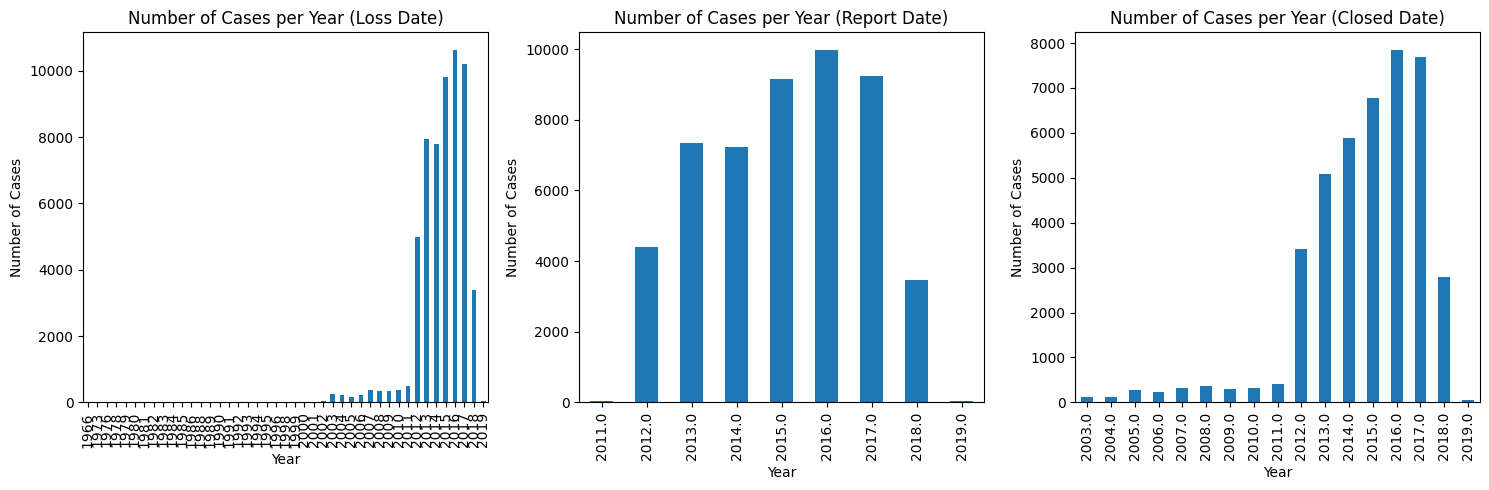

In [16]:
import matplotlib.pyplot as plt

# Convert date columns to datetime format
date_columns = ['Loss Date', 'Report Date', 'Closed Date']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Extract the year from each date column
df['Loss Year'] = df['Loss Date'].dt.year
df['Report Year'] = df['Report Date'].dt.year
df['Closed Year'] = df['Closed Date'].dt.year


# Count the number of cases per year for each date column
loss_year_counts = df['Loss Year'].value_counts().sort_index()
report_year_counts = df['Report Year'].value_counts().sort_index()
closed_year_counts = df['Closed Year'].value_counts().sort_index()


# Plotting the bar charts
plt.figure(figsize=(15, 5))

# Loss Date
plt.subplot(1, 3, 1)
loss_year_counts.plot(kind='bar')
plt.title('Number of Cases per Year (Loss Date)')
plt.xlabel('Year')
plt.ylabel('Number of Cases')

# Report Date
plt.subplot(1, 3, 2)
report_year_counts.plot(kind='bar')
plt.title('Number of Cases per Year (Report Date)')
plt.xlabel('Year')
plt.ylabel('Number of Cases')

# Closed Date
plt.subplot(1, 3, 3)
closed_year_counts.plot(kind='bar')
plt.title('Number of Cases per Year (Closed Date)')
plt.xlabel('Year')
plt.ylabel('Number of Cases')



plt.tight_layout()
plt.show()

In [17]:
# Pruning data before 2012 in Loss Year as we see volume of data from 2012 onwards
data_df = df[df['Loss Year'] >= 2012]

# Check the shape of the pruned dataframe
data_df.shape


(54808, 20)

In [18]:
# Number of records trimmed and percent
trimmed_records = df.shape[0]-data_df.shape[0]
print(trimmed_records, trimmed_records/df.shape[0]*100, sep=" - ")

2932 - 5.077935573259438


In [19]:
# count of null values in each column
null_counts = data_df.isnull().sum()

print(null_counts)

Unique_ID                  0
Case Number                0
Date of Birth          40658
Accident State          9017
Loss Type                  0
Status_Updated             0
Loss Date                  0
Closed Date            15710
Report Date             4105
Cause Description        934
Litigation             13414
Occupation             38636
Carrier                47033
Sector/Industry            0
Claim Cost                 0
High Cost                  0
Litigation_HighCost    13414
Loss Year                  0
Report Year             4105
Closed Year            15710
dtype: int64


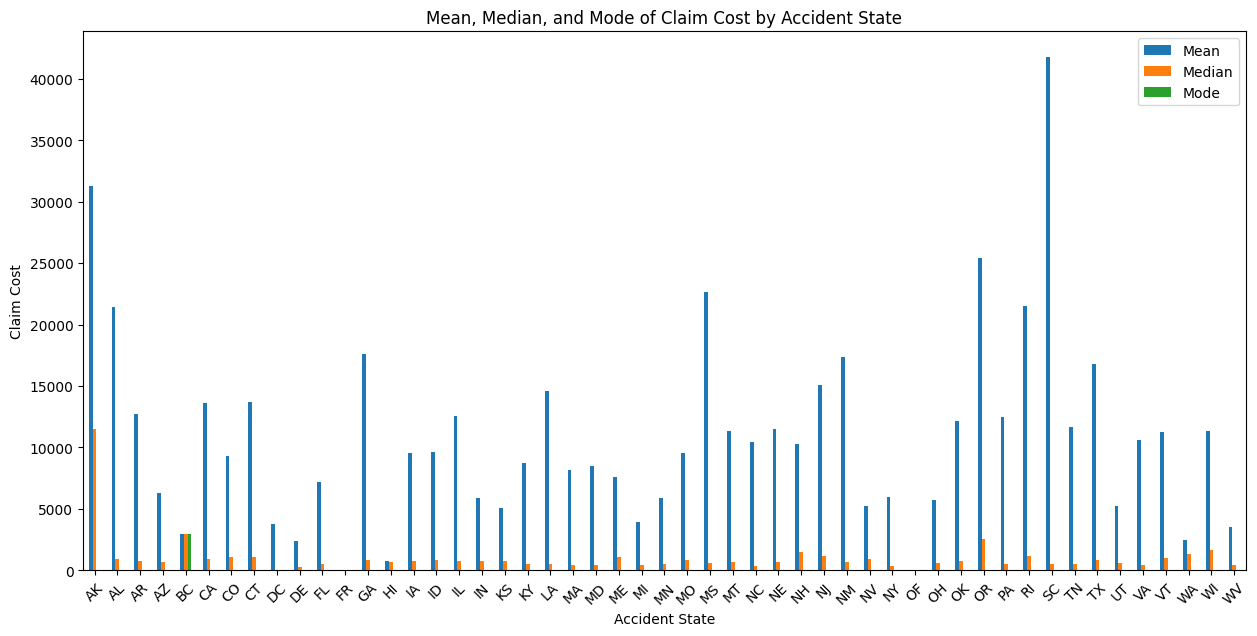

In [20]:
# Calculating mean, median, and mode of Claim Cost for each Accident State
mean_claim_cost = data_df.groupby('Accident State')['Claim Cost'].mean()
median_claim_cost = data_df.groupby('Accident State')['Claim Cost'].median()
mode_claim_cost = data_df.groupby('Accident State')['Claim Cost'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Combine the statistics into a single dataframe
claim_cost_stats = pd.DataFrame({
    'Mean': mean_claim_cost,
    'Median': median_claim_cost,
    'Mode': mode_claim_cost
})

# Plotting the bar chart
claim_cost_stats.plot(kind='bar', figsize=(15, 7))
plt.title('Mean, Median, and Mode of Claim Cost by Accident State')
plt.xlabel('Accident State')
plt.ylabel('Claim Cost')
plt.xticks(rotation=45)
plt.show()


1. **High Cost States**: AK and SC have significantly higher mean claim costs, indicating high expenses.
3. **Outliers Impact**: Large mean-median gaps suggest outliers skewing average costs in all states except BC.
4. **Policy Adjustments**: Insurers might adjust premiums based on state-specific claim cost trends.
5. **Resource Focus**: Allocate resources to high-cost states for better fraud detection and claims management.

### Impact of Duration of Claim (Gap between Report Date and Closed Date) on Claim Cost

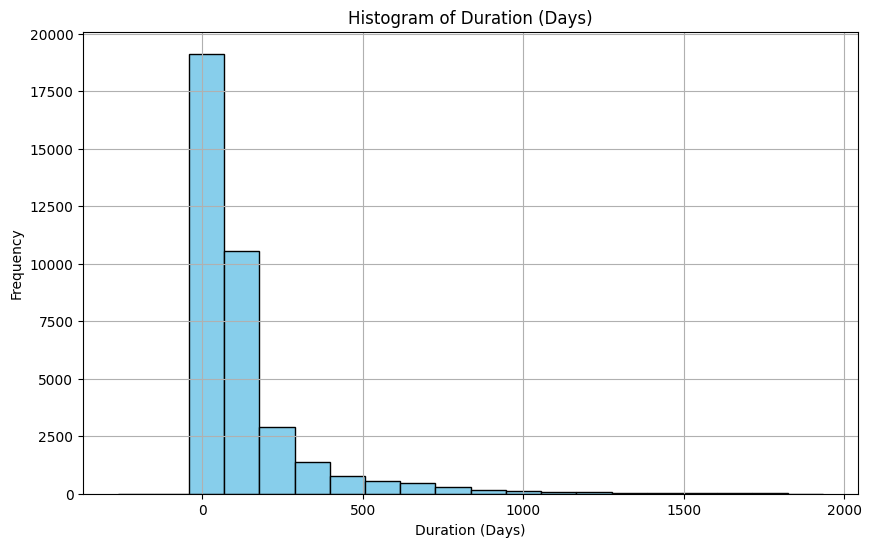

In [21]:
# Create Duration_df with records having both Report Date and Closed Date
Duration_df = df.dropna(subset=['Report Date', 'Closed Date']).copy()

# Create Duration(Days) column
Duration_df['Duration(Days)'] = (Duration_df['Closed Date'] - Duration_df['Report Date']).dt.days

import matplotlib.pyplot as plt

# Plot histogram to see how duration affects claim cost
plt.figure(figsize=(10, 6))
plt.hist(Duration_df['Duration(Days)'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Duration (Days)')
plt.xlabel('Duration (Days)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

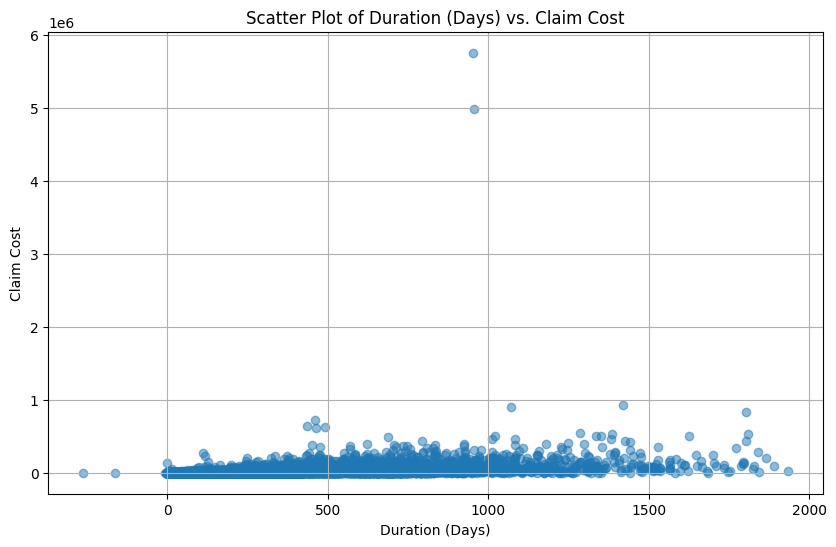

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(Duration_df['Duration(Days)'], Duration_df['Claim Cost'], alpha=0.5)
plt.title('Scatter Plot of Duration (Days) vs. Claim Cost')
plt.xlabel('Duration (Days)')
plt.ylabel('Claim Cost')
plt.grid(True)
plt.show()



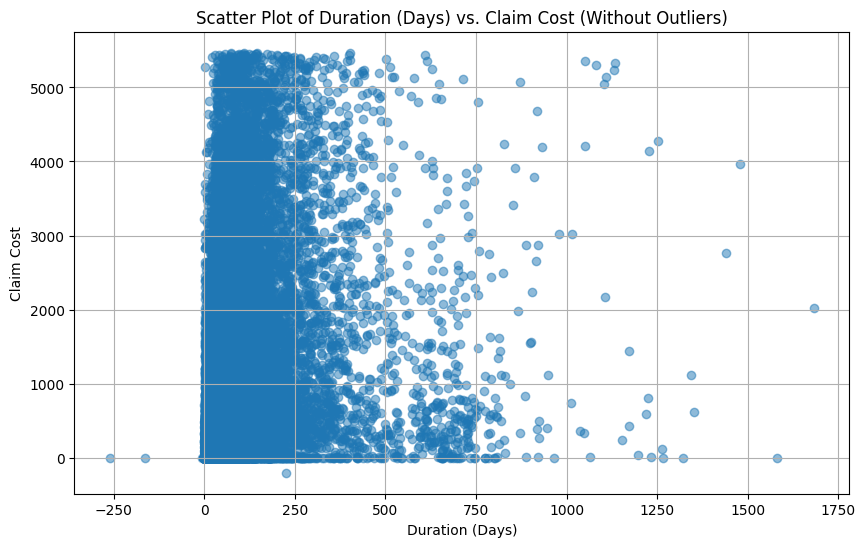

In [23]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = Duration_df['Claim Cost'].quantile(0.25)
Q3 = Duration_df['Claim Cost'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define a threshold to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_df = Duration_df[(Duration_df['Claim Cost'] >= lower_bound) & (Duration_df['Claim Cost'] <= upper_bound)]

# Plot scatter plot without outliers
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['Duration(Days)'], filtered_df['Claim Cost'], alpha=0.5)
plt.title('Scatter Plot of Duration (Days) vs. Claim Cost (Without Outliers)')
plt.xlabel('Duration (Days)')
plt.ylabel('Claim Cost')
plt.grid(True)
plt.show()


### Insights:
- The majority of the claim costs are clustered within a specific range of durations, indicating that most claims are resolved within a certain period.
- There are fewer data points as the duration increases, suggesting that prolonged claim processes are less common.
- **There doesn't appear to be a strong linear relationship between the duration of the claim process and the claim cost. This implies that the duration alone may not be a significant predictor of the claim cost.**

### Q : How are duration and litigation related?

<Figure size 1200x600 with 0 Axes>

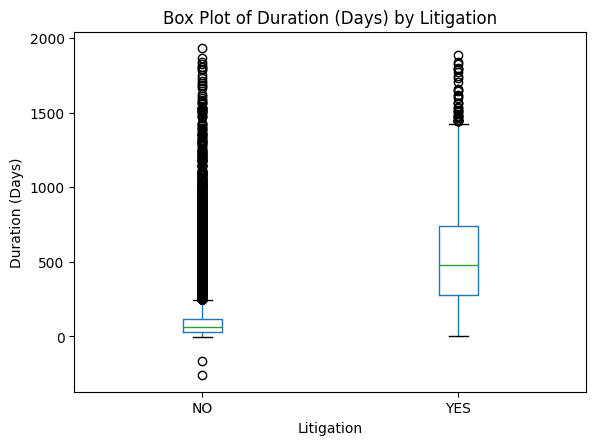

In [24]:
# Create a box plot to compare the duration of claims with and without litigation
plt.figure(figsize=(12, 6))
Duration_df.boxplot(column='Duration(Days)', by='Litigation', grid=False)
plt.title('Box Plot of Duration (Days) by Litigation')
plt.suptitle('')  # Suppress the default title
plt.xlabel('Litigation')
plt.ylabel('Duration (Days)')
plt.show()


-The median duration of claims with litigation is higher compared to claims without litigation. This suggests that **claims involving litigation tend to take longer to resolve.**

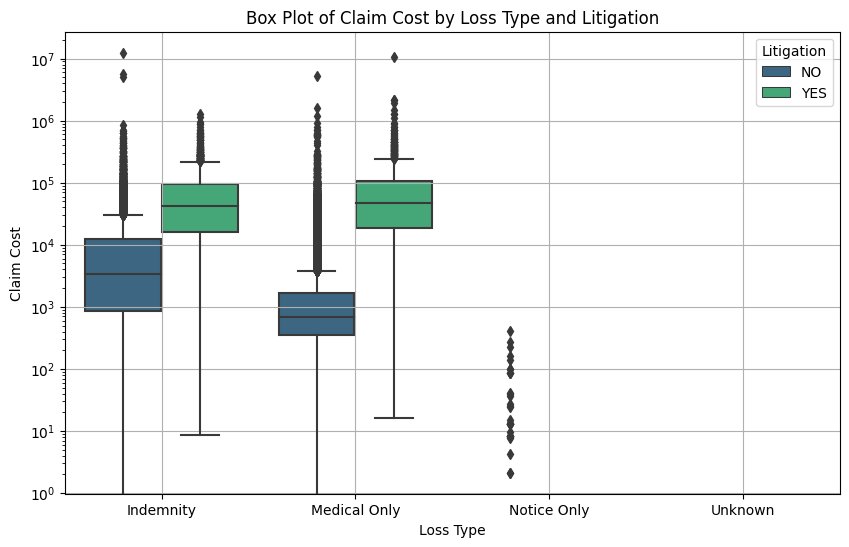

In [25]:
import seaborn as sns

# Plot box plot for Claim Cost by Loss Type and Litigation
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Loss Type', y='Claim Cost', hue='Litigation', palette='viridis')
plt.title('Box Plot of Claim Cost by Loss Type and Litigation')
plt.xlabel('Loss Type')
plt.ylabel('Claim Cost')
plt.yscale('log')  # Using log scale for better visualization if there are large differences in costs
plt.grid(True)
plt.legend(title="Litigation")
plt.show()


### Insights:
- 'Indemnity' has higher median claim costs compared to 'Medical Only'.
- Claims with litigation have higher median claim costs compared to those without litigation.

### Note : Occupation data is available for about 30% of the total records. Hence the following is not a true representation of the entire dataset.
### However, investigating the relationship between claim costs and occupation could highlight the importance of capturing this information more comprehensively in future data collection efforts.

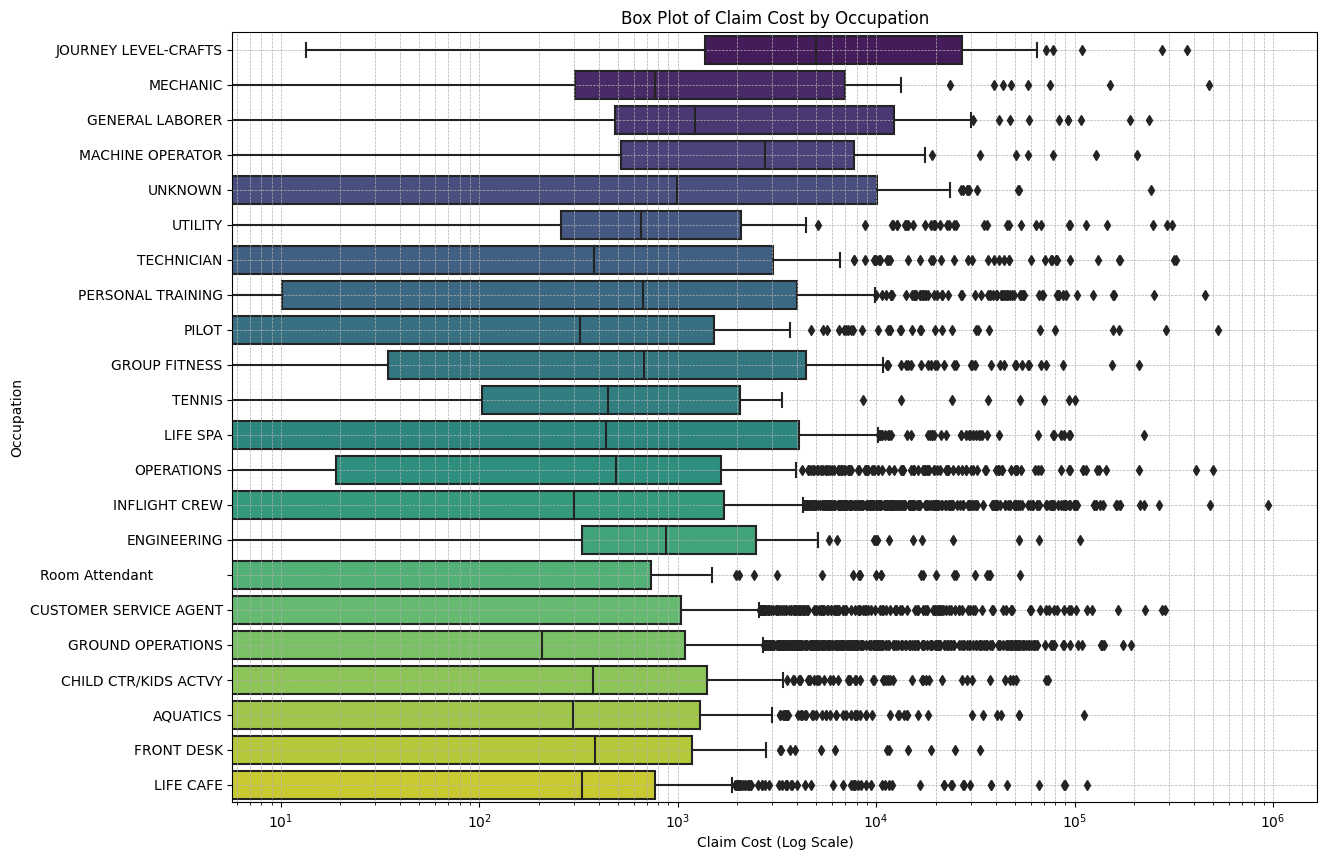

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the 'Occupation' column has no missing values for this analysis
occupation_df = df.dropna(subset=['Occupation']).copy()

# Get the count of each unique occupation
sample_counts = occupation_df['Occupation'].value_counts()

# Get the occupations that have 50 or more occurrences
filtered_occupations = sample_counts[sample_counts >= 50].index

# Filter the DataFrame to include only rows with these occupations
occupation_df = occupation_df[occupation_df['Occupation'].isin(filtered_occupations)]

# Calculate mean claim cost for each occupation
mean_claim_cost = occupation_df.groupby('Occupation')['Claim Cost'].mean()

# Sort occupations by mean claim cost in descending order
sorted_occupations = mean_claim_cost.sort_values(ascending=False).index

# Reorder the DataFrame based on sorted occupations
occupation_df['Occupation'] = pd.Categorical(occupation_df['Occupation'], categories=sorted_occupations, ordered=True)

# Plot horizontal bar plot with log scale for Claim Cost
plt.figure(figsize=(14, 10))
sns.boxplot(y='Occupation', x='Claim Cost', data=occupation_df, palette='viridis')
plt.xscale('log')
plt.title('Box Plot of Claim Cost by Occupation')
plt.ylabel('Occupation')
plt.xlabel('Claim Cost (Log Scale)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.yticks(fontsize=10)  # Adjust the font size of y-tick labels
plt.show()


### Insights :
- Occupations - JOURNEY LEVEL-CRAFTS | MECHANIC | GENERAL LABORER | MACHINE OPERATOR | UTILITY | ENGINEERING have higher median claim costs compared to others

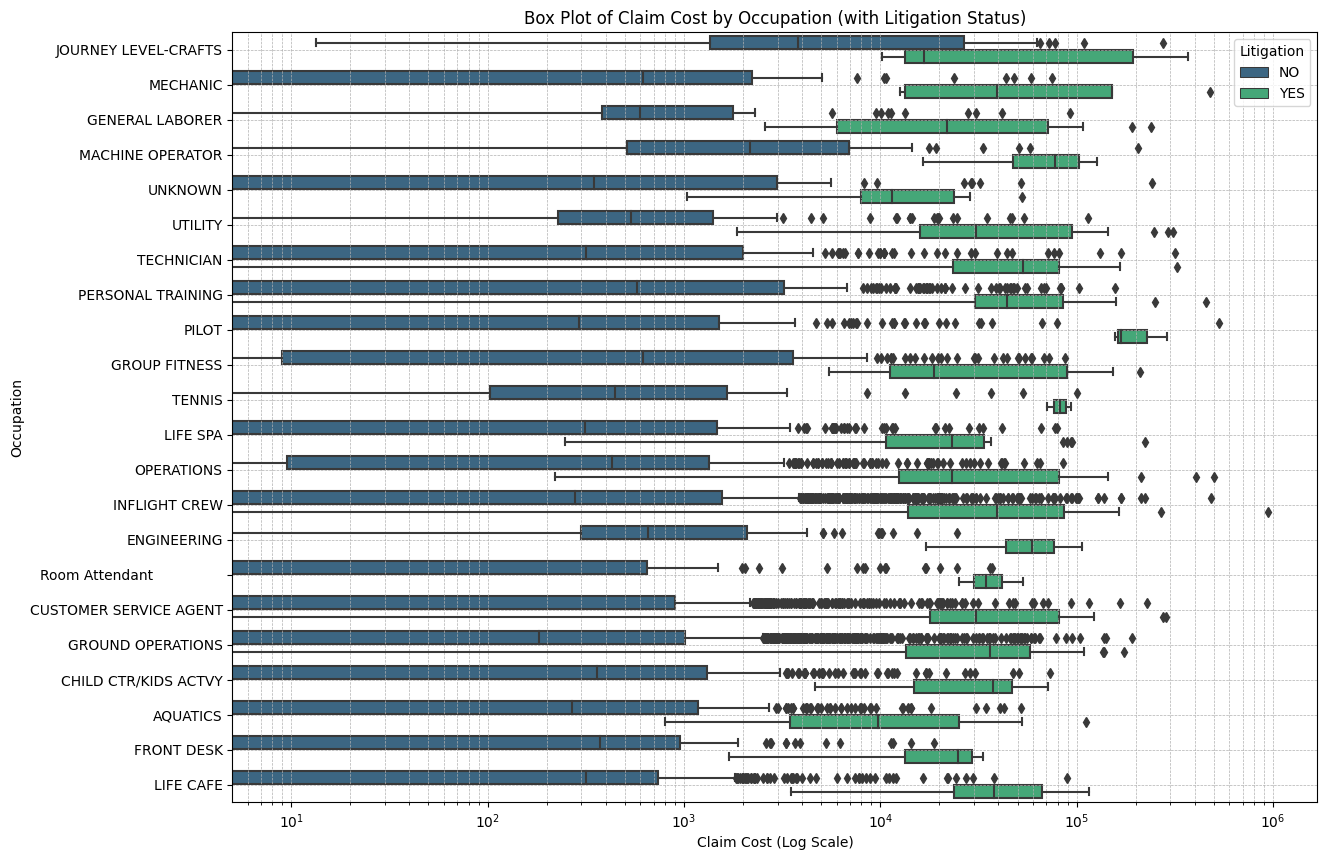

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the 'Occupation' column has no missing values for this analysis
occupation_df = df.dropna(subset=['Occupation']).copy()

# Get the count of each unique occupation
sample_counts = occupation_df['Occupation'].value_counts()

# Get the occupations that have 50 or more occurrences
filtered_occupations = sample_counts[sample_counts >= 50].index

# Filter the DataFrame to include only rows with these occupations
occupation_df = occupation_df[occupation_df['Occupation'].isin(filtered_occupations)]

# Calculate mean claim cost for each occupation
mean_claim_cost = occupation_df.groupby('Occupation')['Claim Cost'].mean()

# Sort occupations by mean claim cost in descending order
sorted_occupations = mean_claim_cost.sort_values(ascending=False).index

# Reorder the DataFrame based on sorted occupations
occupation_df['Occupation'] = pd.Categorical(occupation_df['Occupation'], categories=sorted_occupations, ordered=True)

# Plot horizontal bar plot with log scale for Claim Cost
plt.figure(figsize=(14, 10))
sns.boxplot(y='Occupation', x='Claim Cost', hue='Litigation', data=occupation_df, palette='viridis')
plt.xscale('log')
plt.title('Box Plot of Claim Cost by Occupation (with Litigation Status)')
plt.ylabel('Occupation')
plt.xlabel('Claim Cost (Log Scale)')
plt.legend(title='Litigation')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.yticks(fontsize=10)  # Adjust the font size of y-tick labels
plt.show()


## Insights:
- Significant gap in claim costs between litigation and non-litigation for certain occupations, such as pilot, utility, tennis, engineering, and room attendant, warrants a deeper investigation by the insurer
- Understanding whether these gaps are due to particular risks or hazards associated with these roles could provide insights
- Consider if there are policy adjustments that could be made to address the higher litigation costs. This might include clearer policy terms, improved communication with policyholders, or additional coverage options.

### Feature Engineering using Cause Description

In [28]:

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Download stopwords
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove non-word characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = text.lower()  # Convert to lower case
    return text

def extract_keywords(description):
    words = word_tokenize(description)
    words = [word for word in words if word not in stop_words]
    return words

# Apply cleaning and keyword extraction
data_df['Cleaned Description'] = data_df['Cause Description'].apply(lambda x: clean_text(str(x)))
data_df['Keywords'] = data_df['Cleaned Description'].apply(lambda x: extract_keywords(x))

# Display the first few rows with the new columns
data_df[['Cause Description', 'Cleaned Description', 'Keywords']].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arpit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arpit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\arpit\AppData\Local\Temp\ipykernel_1872\3318385609.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['Cleaned Description'] = data_df['Cause Description'].apply(lambda x: clean_text(str(x)))
C:\Users\arpit\AppData\Local\Temp\ipykernel_1872\3318385609.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

,Cause Description,Cleaned Description,Keywords
0,THE IW REPORTED HE WAS WALKING BACK TO FORK LI...,the iw reported he was walking back to fork li...,"[iw, reported, walking, back, fork, lift, felt..."
1,"IE WAS GETTING OFF A FORKLIFT, FOOT SLIPPED AN...",ie was getting off a forklift foot slipped and...,"[ie, getting, forklift, foot, slipped, felt, p..."
2,"IW WAS WALKING AROUND A SHEETING MACHINE, WHEN...",iw was walking around a sheeting machine when ...,"[iw, walking, around, sheeting, machine, heard..."
3,"IW WAS HANDLING MATERIAL, CONFIRMING ORDER, IW...",iw was handling material confirming order iw t...,"[iw, handling, material, confirming, order, iw..."
4,IW GOT FIBER GLASS DEBRIS IN EYE,iw got fiber glass debris in eye,"[iw, got, fiber, glass, debris, eye]"


In [29]:
body_parts = ['head', 'eye', 'arm', 'leg', 'back', 'hand', 'foot', 'shoulder']
injury_causes = ['fall', 'slip', 'trip', 'cut', 'burn', 'strain', 'sprain', 'hit']

def categorize_keywords(keywords, categories):
    for word in keywords:
        for category in categories:
            if category in word:
                return category
    return 'other'

data_df['Body Part'] = data_df['Keywords'].apply(lambda x: categorize_keywords(x, body_parts))
data_df['Injury Cause'] = data_df['Keywords'].apply(lambda x: categorize_keywords(x, injury_causes))

# Display the first few rows with the new columns
data_df[['Cause Description', 'Keywords', 'Body Part', 'Injury Cause']].head()


C:\Users\arpit\AppData\Local\Temp\ipykernel_1872\1743643983.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['Body Part'] = data_df['Keywords'].apply(lambda x: categorize_keywords(x, body_parts))
C:\Users\arpit\AppData\Local\Temp\ipykernel_1872\1743643983.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['Injury Cause'] = data_df['Keywords'].apply(lambda x: categorize_keywords(x, injury_causes))


,Cause Description,Keywords,Body Part,Injury Cause
0,THE IW REPORTED HE WAS WALKING BACK TO FORK LI...,"[iw, reported, walking, back, fork, lift, felt...",back,other
1,"IE WAS GETTING OFF A FORKLIFT, FOOT SLIPPED AN...","[ie, getting, forklift, foot, slipped, felt, p...",foot,slip
2,"IW WAS WALKING AROUND A SHEETING MACHINE, WHEN...","[iw, walking, around, sheeting, machine, heard...",leg,strain
3,"IW WAS HANDLING MATERIAL, CONFIRMING ORDER, IW...","[iw, handling, material, confirming, order, iw...",hand,hit
4,IW GOT FIBER GLASS DEBRIS IN EYE,"[iw, got, fiber, glass, debris, eye]",eye,other


In [30]:
# One-hot encode the categorical features
one_hot_df = pd.get_dummies(data_df[['Body Part', 'Injury Cause']])

# Combine with the original dataframe
data_df = pd.concat([data_df, one_hot_df], axis=1)

# Display the first few rows with the new columns
data_df.head()


,Unique_ID,Case Number,Date of Birth,Accident State,Loss Type,Status_Updated,Loss Date,Closed Date,Report Date,Cause Description,Litigation,Occupation,Carrier,Sector/Industry,Claim Cost,High Cost,Litigation_HighCost,Loss Year,Report Year,Closed Year,Cleaned Description,Keywords,Body Part,Injury Cause,Body Part_arm,Body Part_back,Body Part_eye,Body Part_foot,Body Part_hand,Body Part_head,Body Part_leg,Body Part_other,Body Part_shoulder,Injury Cause_burn,Injury Cause_cut,Injury Cause_fall,Injury Cause_hit,Injury Cause_other,Injury Cause_slip,Injury Cause_sprain,Injury Cause_strain,Injury Cause_trip
0,1,E8P0048,NaN,IN,Indemnity,Closed,2016-09-28,2016-11-30,2016-10-03,THE IW REPORTED HE WAS WALKING BACK TO FORK LI...,NO,NaN,Carrier 1,Industrials,13491.900269,0,NO - 0,2016,2016.0,2016.0,the iw reported he was walking back to fork li...,"[iw, reported, walking, back, fork, lift, felt...",back,other,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2,E8P0649,NaN,IN,Indemnity,Open,2016-09-30,NaT,2016-10-11,"IE WAS GETTING OFF A FORKLIFT, FOOT SLIPPED AN...",NO,NaN,Carrier 1,Industrials,400921.536300,1,NO - 1,2016,2016.0,NaN,ie was getting off a forklift foot slipped and...,"[ie, getting, forklift, foot, slipped, felt, p...",foot,slip,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,3,E9S0726,NaN,IN,Medical Only,Closed,2017-01-24,2018-01-06,2017-03-02,"IW WAS WALKING AROUND A SHEETING MACHINE, WHEN...",NO,NaN,Carrier 1,Industrials,4886.505400,0,NO - 0,2017,2017.0,2018.0,iw was walking around a sheeting machine when ...,"[iw, walking, around, sheeting, machine, heard...",leg,strain,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,4,E8P4445,NaN,IN,Medical Only,Closed,2016-11-29,2017-02-21,2016-12-02,"IW WAS HANDLING MATERIAL, CONFIRMING ORDER, IW...",NO,NaN,Carrier 1,Industrials,2506.715738,0,NO - 0,2016,2016.0,2017.0,iw was handling material confirming order iw t...,"[iw, handling, material, confirming, order, iw...",hand,hit,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,5,E7D4228,NaN,IN,Indemnity,Closed,2016-07-08,2017-02-18,2016-07-22,IW GOT FIBER GLASS DEBRIS IN EYE,NO,NaN,Carrier 1,Industrials,2916.488363,0,NO - 0,2016,2016.0,2017.0,iw got fiber glass debris in eye,"[iw, got, fiber, glass, debris, eye]",eye,other,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [34]:
data_df.columns

Index(['Unique_ID', 'Case Number', 'Date of Birth', 'Accident State',
       'Loss Type', 'Status_Updated', 'Loss Date', 'Closed Date',
       'Report Date', 'Cause Description', 'Litigation', 'Occupation',
       'Carrier', 'Sector/Industry', 'Claim Cost', 'High Cost',
       'Litigation_HighCost', 'Loss Year', 'Report Year', 'Closed Year',
       'Cleaned Description', 'Keywords', 'Body Part', 'Injury Cause',
       'Body Part_arm', 'Body Part_back', 'Body Part_eye', 'Body Part_foot',
       'Body Part_hand', 'Body Part_head', 'Body Part_leg', 'Body Part_other',
       'Body Part_shoulder', 'Injury Cause_burn', 'Injury Cause_cut',
       'Injury Cause_fall', 'Injury Cause_hit', 'Injury Cause_other',
       'Injury Cause_slip', 'Injury Cause_sprain', 'Injury Cause_strain',
       'Injury Cause_trip'],
      dtype='object')

In [31]:
# Save DataFrame to Excel
data_df.to_excel('model_dataset.xlsx', index=False)

Feature Importance for Claim Cost

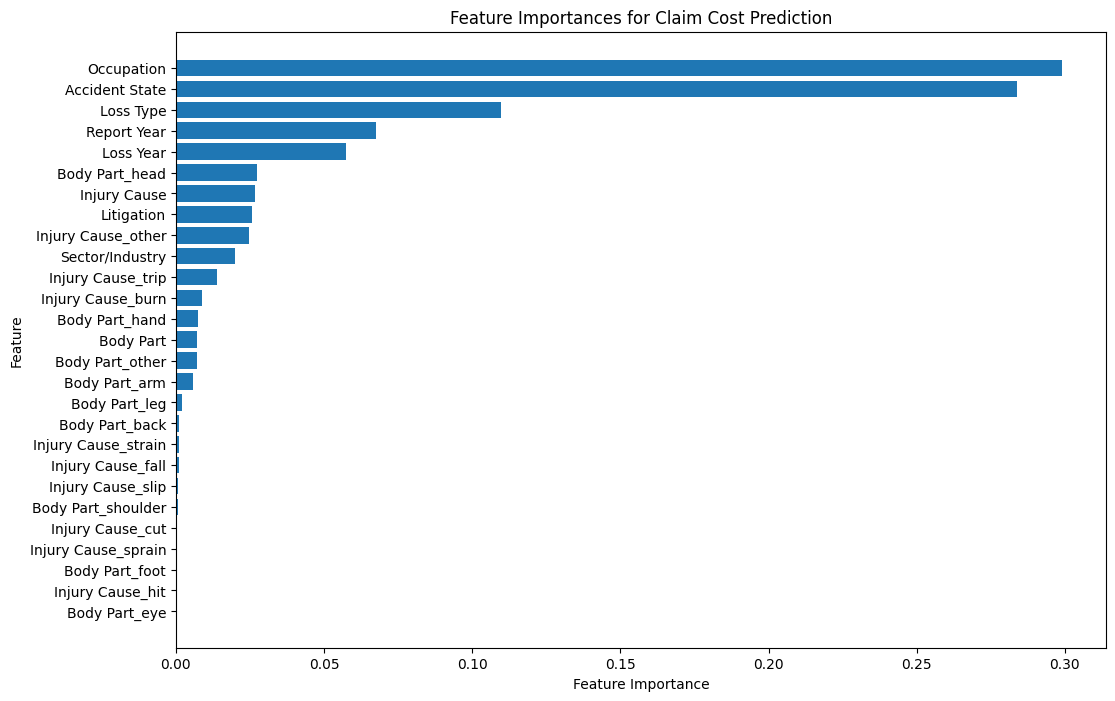

,Feature,Importance
4,Occupation,0.298903
0,Accident State,0.283964
1,Loss Type,0.109832
6,Report Year,0.067660
5,Loss Year,0.057394
14,Body Part_head,0.027444
8,Injury Cause,0.026593
2,Litigation,0.025791
22,Injury Cause_other,0.024611
3,Sector/Industry,0.020075


In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load the dataset
file_path = r'C:\Users\arpit\Desktop\UG\Arpit Agrawal DS\Marsh Case Study\model_dataset.xlsx'
df = pd.read_excel(file_path)

df.dropna(subset=['Occupation'], inplace=True)


# Select relevant columns
features = ['Accident State', 'Loss Type', 'Litigation', 'Sector/Industry', 'Occupation', 'Loss Year', 
            'Report Year', 'Body Part', 'Injury Cause','Body Part_arm', 'Body Part_back', 'Body Part_eye', 'Body Part_foot',
            'Body Part_hand', 'Body Part_head', 'Body Part_leg', 'Body Part_other',
            'Body Part_shoulder', 'Injury Cause_burn', 'Injury Cause_cut',
            'Injury Cause_fall', 'Injury Cause_hit', 'Injury Cause_other',
            'Injury Cause_slip', 'Injury Cause_sprain', 'Injury Cause_strain',
            'Injury Cause_trip']

# Assuming 'Claim Cost' is the target variable
target = 'Claim Cost'

# Encode categorical features
label_encoders = {}
for col in features:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le

# Impute missing values with the median for numerical features
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(df[features])
y = df[target].fillna(df[target].median())  # Impute missing target values with median

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for Claim Cost Prediction')
plt.gca().invert_yaxis()
plt.show()

# Display feature importances
feature_importances

Feature Importance for Litigation - Yes or No

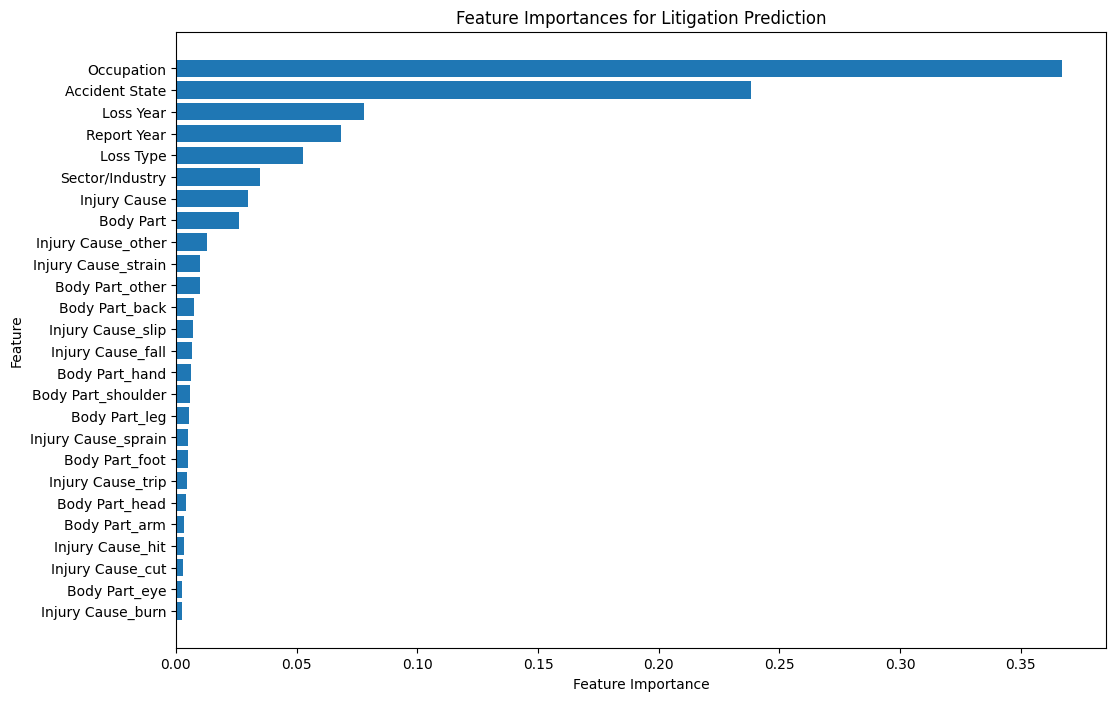

                Feature  Importance
3            Occupation    0.366870
0        Accident State    0.238094
4             Loss Year    0.077921
5           Report Year    0.068271
1             Loss Type    0.052501
2       Sector/Industry    0.034645
7          Injury Cause    0.030032
6             Body Part    0.025990
21   Injury Cause_other    0.013071
24  Injury Cause_strain    0.010160
15      Body Part_other    0.009939
9        Body Part_back    0.007622
22    Injury Cause_slip    0.006916
19    Injury Cause_fall    0.006604
12       Body Part_hand    0.006076
16   Body Part_shoulder    0.005834
14        Body Part_leg    0.005481
23  Injury Cause_sprain    0.005089
11       Body Part_foot    0.005052
25    Injury Cause_trip    0.004798
13       Body Part_head    0.004019
8         Body Part_arm    0.003475
20     Injury Cause_hit    0.003238
18     Injury Cause_cut    0.003133
10        Body Part_eye    0.002684
17    Injury Cause_burn    0.002486


C:\Users\arpit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Random Forest Classifier - Train Score: 0.9891783257323955
Random Forest Classifier - Test Score: 0.9239567233384853
Random Forest Classifier - Cross-Validation Scores: [0.9366306  0.78948995 0.42888064 0.44743352 0.26716141]
Random Forest Classifier - Mean Cross-Validation Score: 0.573919225692244


In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load the dataset
file_path = r'C:\Users\arpit\Desktop\UG\Arpit Agrawal DS\Marsh Case Study\model_dataset.xlsx'
df = pd.read_excel(file_path)

# Drop rows with missing 'Occupation'
df.dropna(subset=['Occupation'], inplace=True)

# Select relevant columns
features = ['Accident State', 'Loss Type', 'Sector/Industry', 'Occupation', 'Loss Year', 
            'Report Year', 'Body Part', 'Injury Cause','Body Part_arm', 'Body Part_back', 'Body Part_eye', 'Body Part_foot',
            'Body Part_hand', 'Body Part_head', 'Body Part_leg', 'Body Part_other',
            'Body Part_shoulder', 'Injury Cause_burn', 'Injury Cause_cut',
            'Injury Cause_fall', 'Injury Cause_hit', 'Injury Cause_other',
            'Injury Cause_slip', 'Injury Cause_sprain', 'Injury Cause_strain',
            'Injury Cause_trip']

# Target variable
target = 'Litigation'

# Encode categorical features
label_encoders = {}
for col in features:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le

# Encode the target variable
le_target = LabelEncoder()
df[target] = le_target.fit_transform(df[target].astype(str))

# Impute missing values with the median for numerical features
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(df[features])
y = df[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for Litigation Prediction')
plt.gca().invert_yaxis()
plt.show()

# Display feature importances
print(feature_importances)

# Evaluate the model
train_score = rf.score(X_train, y_train)
test_score = rf.score(X_test, y_test)
cv_scores = cross_val_score(rf, X, y, cv=5)

print(f"Random Forest Classifier - Train Score: {train_score}")
print(f"Random Forest Classifier - Test Score: {test_score}")
print(f"Random Forest Classifier - Cross-Validation Scores: {cv_scores}")
print(f"Random Forest Classifier - Mean Cross-Validation Score: {np.mean(cv_scores)}")



## Training

In [8]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from joblib import Parallel, delayed

# Load the dataset
file_path = r'C:\Users\arpit\Desktop\UG\Arpit Agrawal DS\Marsh Case Study\model_dataset.xlsx'
df = pd.read_excel(file_path)

# Replace missing values with 'Unknown'
df['Occupation'] = df['Occupation'].fillna('Unknown')


# Define the relevant features and target variable
features = ['Accident State', 'Sector/Industry', 'Loss Type', 
            'Litigation', 'Occupation','Body Part', 'Injury Cause']
target = 'Claim Cost'

# Encode categorical features
label_encoders = {}
for col in features:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le

# Save the label encoders
joblib.dump(label_encoders, 'label_encoders.joblib')


# Handle missing values
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(df[features])
y = df[target].fillna(df[target].median())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05],
    'max_depth': [3, 5, 7],
    'colsample_bytree': [0.3, 0.5],
    'alpha': [0, 5, 10],
    'subsample': [0.6, 0.8]
}
# Custom callback to track the number of fits
class GridSearchProgress:
    def __init__(self, total_fits):
        self.total_fits = total_fits
        self.fit_count = 0

    def __call__(self):
        self.fit_count += 1
        print(f"Fit {self.fit_count}/{self.total_fits} done")

# Calculate total number of fits
total_fits = len(ParameterGrid(param_grid))
progress = GridSearchProgress(total_fits)

# Perform Grid Search with Cross-Validation
def custom_fit(params, X_train, y_train, X_test, y_test, progress):
    model = xgb.XGBRegressor(objective='reg:squarederror', **params)
    model.fit(X_train, y_train)
    progress()
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    return model, mse

results = Parallel(n_jobs=-1, verbose=2)(
    delayed(custom_fit)(params, X_train, y_train, X_test, y_test, progress)
    for params in ParameterGrid(param_grid)
)

# Get the best model
best_model, best_mse = min(results, key=lambda x: x[1])

# Save the trained model
model_filename = 'best_xgboost_model.joblib'
joblib.dump(best_model, model_filename)

print(f"Model saved to {model_filename}")

# Evaluate the model
train_score = best_model.score(X_train, y_train)
test_score = best_model.score(X_test, y_test)
cv_scores = cross_val_score(best_model, X, y, cv=5)

print(f"Best XGBoost - Train Score: {train_score}")
print(f"Best XGBoost - Test Score: {test_score}")
print(f"Best XGBoost - Cross-Validation Scores: {cv_scores}")
print(f"Best XGBoost - Mean Cross-Validation Score: {np.mean(cv_scores)}")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  1.1min finished


Model saved to best_xgboost_model.joblib
Best XGBoost - Train Score: 0.4763610830211008
Best XGBoost - Test Score: 0.28432376377267277
Best XGBoost - Cross-Validation Scores: [ 0.16485628  0.18506669  0.06612392 -0.0107218   0.01272503]
Best XGBoost - Mean Cross-Validation Score: 0.0836100216256022


#######################################################################

### Model for Predicting Litigation - Yes or No

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
file_path = r'C:\Users\arpit\Desktop\UG\Arpit Agrawal DS\Marsh Case Study\model_dataset.xlsx'
data_df = pd.read_excel(file_path)

# Prepare the data with the new features
features = ['Occupation', 'Accident State', 'Loss Type', 'Report Year', 'Loss Year', 'Sector/Industry', 'Injury Cause', 'Body Part']
X = data_df[features]
y = data_df['Litigation'].apply(lambda x: 1 if x == 'YES' else 0)

# Define the preprocessing for categorical features
categorical_features = ['Occupation', 'Accident State', 'Loss Type', 'Sector/Industry', 'Injury Cause', 'Body Part']
numeric_features = ['Report Year', 'Loss Year']

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create and train the logistic regression model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(max_iter=1000))])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[15685    40]
 [  688    30]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     15725
           1       0.43      0.04      0.08       718

    accuracy                           0.96     16443
   macro avg       0.69      0.52      0.53     16443
weighted avg       0.93      0.96      0.94     16443

